## Predicting the Critical Temperature of Superconductors 

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- ggplot2
- GGally
- gridExtra
- cowplot
- caret

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

In [1]:
options(warn=-1)
library(ISLR)
library(ggplot2)
library(GGally)
library(gridExtra)
library(cowplot)
library(caret)
library(reshape2)
library(corrplot)
library(dplyr)
library(glmnet)
library(hrbrthemes)
library(dplyr)
library(tidyr)
library(viridis)
library(leaps)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: lattice
corrplot 0.84 loaded

Attaching package: 'dplyr'

The following object is masked from 'package:gridExtra':

    combine

The following object is masked from 'package:GGally':

    nasa

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-18

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.
      Please use hrbrthemes::import_roboto_condensed() to install Roboto Conde

In [2]:
#install.packages('hrbrthemes')


## 1. Introduction <a class="anchor" id="sec_1"></a>

We have given superconductor dataset to anaylse and solve following problems
- **predict** the Critical Temperature Tc given some chemical properties of a material such as Atomic Mass, First Ionization Energy, Atomic Radius, Density, Electron Affinity, Fusion Heat, Thermal Conductivity, Valence.
- **explain** the prediction and resulted findings i.e the features which are associated with the Critical Temperature(response variable).

As we have in the asssignment specification the 

In [3]:
# loading the data
super.conductors <- read.csv('train.csv')

In [4]:
head(super.conductors)

number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
4,88.94447,57.86269,66.36159,36.11661,1.181795,1.0623955,122.9061,31.79492,51.96883,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.4330127,0.4370588,29
5,92.72921,58.51842,73.13279,36.39660,1.449309,1.0577551,122.9061,36.16194,47.09463,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.6324555,0.4686063,26
4,88.94447,57.88524,66.36159,36.12251,1.181795,0.9759805,122.9061,35.74110,51.96883,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.4330127,0.4446966,19
4,88.94447,57.87397,66.36159,36.11956,1.181795,1.0222909,122.9061,33.76801,51.96883,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.4330127,0.4409521,22
4,88.94447,57.84014,66.36159,36.11072,1.181795,1.1292237,122.9061,27.84874,51.96883,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.4330127,0.4288095,23
4,88.94447,57.79504,66.36159,36.09893,1.181795,1.2252028,122.9061,20.68746,51.96883,...,2.214286,2.213364,2.181543,1.368922,1.141474,1,1.000000,0.4330127,0.4103259,23


In [5]:
dim(super.conductors) # dimensions of the data

[1] 21263    82

In [6]:
summary(super.conductors)

 number_of_elements mean_atomic_mass  wtd_mean_atomic_mass gmean_atomic_mass
 Min.   :1.000      Min.   :  6.941   Min.   :  6.423      Min.   :  5.321  
 1st Qu.:3.000      1st Qu.: 72.458   1st Qu.: 52.144      1st Qu.: 58.041  
 Median :4.000      Median : 84.923   Median : 60.697      Median : 66.362  
 Mean   :4.115      Mean   : 87.558   Mean   : 72.988      Mean   : 71.291  
 3rd Qu.:5.000      3rd Qu.:100.404   3rd Qu.: 86.104      3rd Qu.: 78.117  
 Max.   :9.000      Max.   :208.980   Max.   :208.980      Max.   :208.980  
 wtd_gmean_atomic_mass entropy_atomic_mass wtd_entropy_atomic_mass
 Min.   :  1.961       Min.   :0.0000      Min.   :0.0000         
 1st Qu.: 35.249       1st Qu.:0.9667      1st Qu.:0.7754         
 Median : 39.918       Median :1.1995      Median :1.1468         
 Mean   : 58.540       Mean   :1.1656      Mean   :1.0639         
 3rd Qu.: 73.113       3rd Qu.:1.4445      3rd Qu.:1.3594         
 Max.   :208.980       Max.   :1.9838      Max.   :1.9582  

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In this task, we analyse the data i.e how 81 features are related with the response variable(Critical Temparature). So we explore the data by plotting some graphs. As each property has 10 features, we have 8 properties and  that adds upto 81 features including no_of_elements.

By plotting the correlation plot using corrplot library, which gives the correlation between all the features along with the response variable.

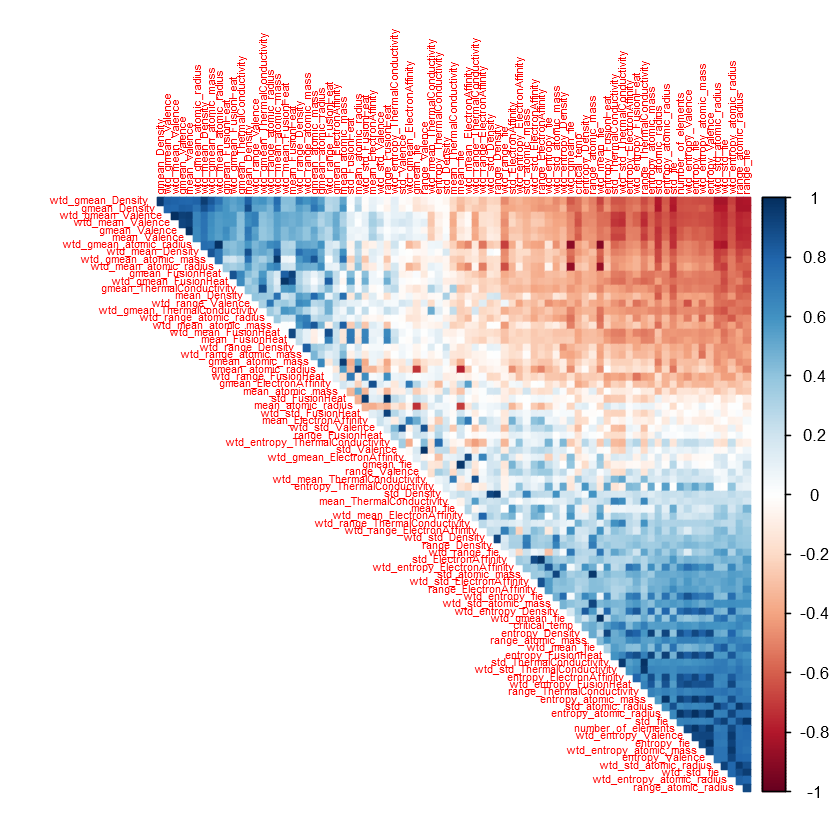

In [7]:
corrplot(cor(super.conductors), diag = FALSE, order = "FPC",
         tl.pos = "td", tl.cex = 0.5, method = "color", type = "upper")


As the correlation matrix above, visualises and guves the correlation between all the features. The ones with high postive correlation are shown in blue, the ones which are in red has high negative correlation.  The ones with white are signifies there is no correlation between the two features.

From the above plot we are unable to interpret which features have high correlation positively and negatively, no correlation features. Descriptive statistics could help us draw some insights.

In [8]:
corr.features <- cor(super.conductors)
corr.features

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000000,-0.14192280,-0.35306443,-0.2929688,-0.4545251,0.93930406,0.88184515,0.68277707,-0.32029345,0.5139981526,...,-0.648550851,-0.61851245,-0.65926774,0.967832451,0.89255947,0.23187398,-0.44776982,0.1053651524,3.521629e-02,0.60106857
mean_atomic_mass,-0.141922797,1.00000000,0.81597703,0.9402982,0.7458406,-0.10400015,-0.09760923,0.12565860,0.44622490,0.1964604909,...,0.304683244,0.39215274,0.32139894,-0.156786430,-0.14561039,-0.10744973,0.16863251,-0.0802785631,-8.125268e-02,-0.11352325
wtd_mean_atomic_mass,-0.353064435,0.81597703,1.00000000,0.8482415,0.9640851,-0.30804601,-0.41266551,-0.14402944,0.71662323,-0.0607391526,...,0.545587036,0.53978021,0.54898099,-0.375718236,-0.33102463,-0.03915540,0.33090381,-0.0036814755,7.732287e-02,-0.31227202
gmean_atomic_mass,-0.292968819,0.94029816,0.84824153,1.0000000,0.8569754,-0.19021379,-0.23218315,-0.17586064,0.45847308,-0.1217079760,...,0.427960618,0.51150783,0.45035665,-0.306246222,-0.30766231,-0.16501026,0.27230262,-0.1246268554,-1.173359e-01,-0.23034537
wtd_gmean_atomic_mass,-0.454525138,0.74584058,0.96408510,0.8569754,1.0000000,-0.37056145,-0.48466354,-0.35209289,0.67332595,-0.2744866783,...,0.614100391,0.60841713,0.62326071,-0.477785173,-0.44807156,-0.07864085,0.40967357,-0.0333133983,3.036055e-02,-0.36985838
entropy_atomic_mass,0.939304058,-0.10400015,-0.30804601,-0.1902138,-0.3705614,1.00000000,0.88970923,0.53877395,-0.28494088,0.3579513944,...,-0.586854563,-0.55447738,-0.59281734,0.963621132,0.86147870,0.20320654,-0.35004711,0.0878380293,1.875795e-02,0.54361941
wtd_entropy_atomic_mass,0.881845150,-0.09760923,-0.41266551,-0.2321831,-0.4846635,0.88970923,1.00000000,0.62443165,-0.54330507,0.4745418195,...,-0.644335645,-0.58622615,-0.65024724,0.897636191,0.91828444,0.16135009,-0.54690957,0.0563090409,-6.936555e-03,0.62693040
range_atomic_mass,0.682777066,0.12565860,-0.14402944,-0.1758606,-0.3520929,0.53877395,0.62443165,1.00000000,-0.10980414,0.9608541605,...,-0.466071357,-0.45049315,-0.48064490,0.678332997,0.68323837,0.20886106,-0.36539483,0.1346764227,1.026337e-01,0.49196981
wtd_range_atomic_mass,-0.320293446,0.44622490,0.71662323,0.4584731,0.6733260,-0.28494088,-0.54330507,-0.10980414,1.00000000,-0.0179786254,...,0.445873985,0.39000548,0.44520132,-0.302455919,-0.40959864,0.02325057,0.59421361,0.0667389310,9.281889e-02,-0.33713139
std_atomic_mass,0.513998153,0.19646049,-0.06073915,-0.1217080,-0.2744867,0.35795139,0.47454182,0.96085416,-0.01797863,1.0000000000,...,-0.337815084,-0.33062957,-0.35290120,0.518438665,0.54060137,0.19234728,-0.27359770,0.1441061112,1.225468e-01,0.37876583


As we can see from the above output of correlation matrix, there are lot features which doesn't show any correlation with each other and along with the response variable as well. So we will try to find which features are associated(correlated) with the response variable(Critical Temparature) as follows.

In [9]:
# creating a dataframe to extract the correlation between response variable and the features
m1 <- t(as.data.frame(t(as.matrix(corr.features[82,])))) # converting to dataframe and transposing it

# reshaping the dataframe which is created above 
m2 <- data.frame(r1= row.names(m1), m1, row.names=NULL) 
colnames(m2) <-  c("feature","corr")  # renaming the columns to feature and corr

# sorting the dataframe 
sorted_m2 <- m2[order(m2$corr),]
sorted_m2

,feature,corr
73,wtd_mean_Valence,-0.6324010
75,wtd_gmean_Valence,-0.6156533
72,mean_Valence,-0.6000849
74,gmean_Valence,-0.5730681
34,gmean_Density,-0.5416844
35,wtd_gmean_Density,-0.5400456
79,wtd_range_Valence,-0.4399008
33,wtd_mean_Density,-0.4339396
55,wtd_gmean_FusionHeat,-0.4323645
54,gmean_FusionHeat,-0.4317946


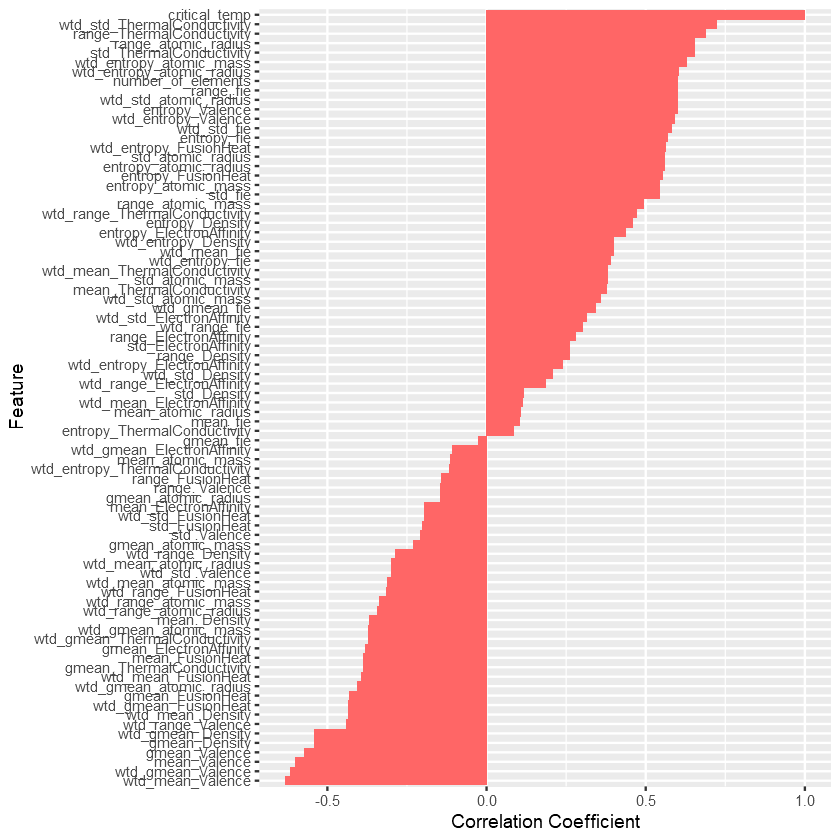

In [10]:
# plotting the dataframe using ggplot library
ggplot(sorted_m2, aes(x = factor(feature, levels = feature), y = corr)) + 
    geom_bar(stat = "identity", fill = "#FF6666") + 
    coord_flip() + 
    xlab("Feature") + 
    ylab("Correlation Coefficient")

- The plot shows feature named `wtd_std_Thermal_Conductivity` has the highest positive correlation with the response variable. Except wtd_gmean_ThermalConductivity, gmean_ThermalConductivity all the features of Thermal Conductivity property shows positive correlation with the critical temparature. So in predicting critical temparature, Thermal Conductivity is very useful.
- If we consider negative correlation, Valence Property is negatively correlated with the critical temparature. Moreover, `wtd_mean_Valence` has the highest negative correlation with critical temparature which as the wtd_mean_Valence is more in particular superconductor, it's critical temparature would like be very less. 
- After that, we have wtd_gmean_Valence, mean_Valence, gmean_Valence have negative correlation with the critical temparature. So the Property Valence could have opposite effect on critical temparature.
- When it comes down to no correction feature, gmean_fie has almost no efffect on the critical temparature.
- Electron Affinity property is slightly correlated with the critical temparature as most of the features of the property have correlation coefficient less than 0.3. 
- So while extracting the features, we could see properties which have positive and negative correlation coefficinets on the response variable.

Finding correlation between the features and removing them with respect to the threshold value




In [11]:
corr.features <- cor(super.conductors)
corr.fea <- findCorrelation(corr.features, cutoff = 0.9)
final.df <- super.conductors[, -c(corr.fea)]

In [12]:
head(final.df)

mean_atomic_mass,wtd_mean_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,mean_fie,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,std_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,gmean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence,critical_temp
88.94447,57.86269,1.0623955,31.79492,51.96883,775.425,938.0168,0.7914878,735.9857,323.8118,...,0.6219795,0.3081480,0.2628483,57.12767,168.8542,2.213364,1,1.085714,0.4370588,29
92.72921,58.51842,1.0577551,36.16194,47.09463,766.440,938.7454,0.8070782,743.1643,290.1830,...,0.6197346,0.8474042,0.5677061,51.41338,198.5546,1.888175,2,1.128571,0.4686063,26
88.94447,57.88524,0.9759805,35.74110,51.96883,775.425,939.0090,0.7736202,743.1643,323.8118,...,0.6190947,0.3081480,0.2504774,57.12767,168.8542,2.213364,1,1.114286,0.4446966,19
88.94447,57.87397,1.0222909,33.76801,51.96883,775.425,938.5128,0.7832067,739.5750,323.8118,...,0.6205354,0.3081480,0.2570451,57.12767,168.8542,2.213364,1,1.100000,0.4409521,22
88.94447,57.84014,1.1292237,27.84874,51.96883,775.425,937.0256,0.8052296,728.8071,323.8118,...,0.6248777,0.3081480,0.2728199,57.12767,168.8542,2.213364,1,1.057143,0.4288095,23
88.94447,57.79504,1.2252028,20.68746,51.96883,775.425,935.0463,0.8247426,714.4500,323.8118,...,0.6307148,0.3081480,0.2882356,57.12767,168.8542,2.213364,1,1.000000,0.4103259,23


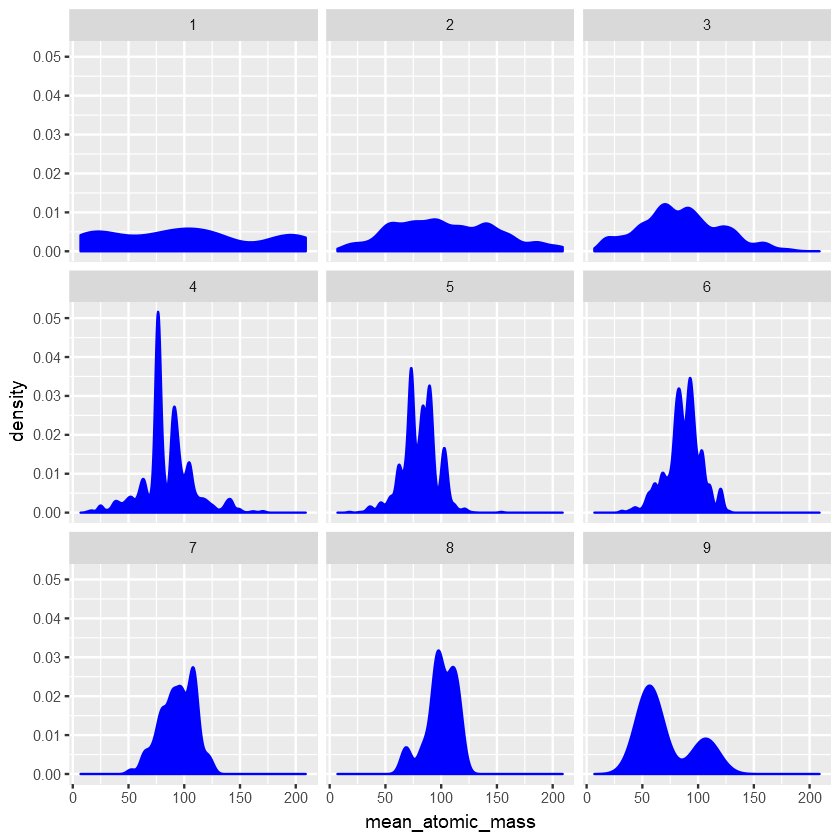

In [13]:
#ggplot(data=super.conductors, aes(x=mean_atomic_mass, group=critical_temp, fill=critical_temp)) +
    #geom_density(adjust=1.5) +
    #theme_ipsum()
ggplot(super.conductors, aes(x = mean_atomic_mass)) + geom_density(color='blue',fill='blue') + 
facet_wrap(super.conductors$number_of_elements)

In [14]:
# removing features which are not correlated with response variable
corr.res <- cor(final.df)
criticaltemp <- corr.res[47,]
thres.cor <- criticaltemp[abs(criticaltemp) > 0.3]

In [15]:
# final features after removing less correlated features
matrix.features <- t(as.matrix(thres.cor))
colnames(matrix.features)

[1] "wtd_mean_atomic_mass"          "wtd_entropy_atomic_mass"      
 [3] "wtd_range_atomic_mass"         "std_atomic_mass"              
 [5] "wtd_gmean_fie"                 "wtd_entropy_fie"              
 [7] "wtd_range_fie"                 "std_fie"                      
 [9] "wtd_range_atomic_radius"       "std_atomic_radius"            
[11] "mean_Density"                  "wtd_mean_Density"             
[13] "gmean_Density"                 "entropy_Density"              
[15] "wtd_entropy_Density"           "gmean_ElectronAffinity"       
[17] "entropy_ElectronAffinity"      "wtd_std_ElectronAffinity"     
[19] "mean_FusionHeat"               "wtd_entropy_FusionHeat"       
[21] "wtd_range_FusionHeat"          "mean_ThermalConductivity"     
[23] "wtd_mean_ThermalConductivity"  "gmean_ThermalConductivity"    
[25] "wtd_gmean_ThermalConductivity" "wtd_range_ThermalConductivity"
[27] "std_ThermalConductivity"       "gmean_Valence"                
[29] "wtd_range_Valence"             "wtd_std_Valence"              
[31] "critical_temp"

'wtd_mean_atomic_mass','wtd_entropy_atomic_mass','wtd_range_atomic_mass','std_atomic_mass','wtd_gmean_fie' 'wtd_entropy_fie','wtd_range_fie','std_fie','wtd_range_atomic_radius','std_atomic_radius','mean_Density','wtd_mean_Density','gmean_Density','entropy_Density','wtd_entropy_Density','gmean_ElectronAffinity','entropy_ElectronAffinity','wtd_std_ElectronAffinity','mean_FusionHeat','wtd_entropy_FusionHeat','wtd_range_FusionHeat''mean_ThermalConductivity','wtd_mean_ThermalConductivity','gmean_ThermalConductivity','wtd_gmean_ThermalConductivity','wtd_range_ThermalConductivity','std_ThermalConductivity','gmean_Valence','wtd_range_Valence','wtd_std_Valence','critical_temp'



In [16]:
new.varfeatures <- final.df[, (names(final.df) %in% c('wtd_mean_atomic_mass','wtd_entropy_atomic_mass','wtd_range_atomic_mass','std_atomic_mass','wtd_gmean_fie','wtd_entropy_fie','wtd_range_fie','std_fie','wtd_range_atomic_radius','std_atomic_radius','mean_Density','wtd_mean_Density','gmean_Density','entropy_Density','wtd_entropy_Density','gmean_ElectronAffinity','entropy_ElectronAffinity','wtd_std_ElectronAffinity','mean_FusionHeat','wtd_entropy_FusionHeat','wtd_range_FusionHeat','mean_ThermalConductivity','wtd_mean_ThermalConductivity','gmean_ThermalConductivity','wtd_gmean_ThermalConductivity','wtd_range_ThermalConductivity','std_ThermalConductivity','gmean_Valence','wtd_range_Valence','wtd_std_Valence','critical_temp' ))]

In [17]:
head(new.varfeatures)

wtd_mean_atomic_mass,wtd_entropy_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_gmean_fie,wtd_entropy_fie,wtd_range_fie,std_fie,wtd_range_atomic_radius,std_atomic_radius,...,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,gmean_Valence,wtd_range_Valence,wtd_std_Valence,critical_temp
57.86269,1.0623955,31.79492,51.96883,938.0168,0.7914878,735.9857,323.8118,42.91429,75.23754,...,107.7566,61.01519,7.062488,0.6219795,57.12767,168.8542,2.213364,1.085714,0.4370588,29
58.51842,1.0577551,36.16194,47.09463,938.7454,0.8070782,743.1643,290.1830,50.57143,67.32132,...,172.2053,61.37233,16.064228,0.6197346,51.41338,198.5546,1.888175,1.128571,0.4686063,26
57.88524,0.9759805,35.74110,51.96883,939.0090,0.7736202,743.1643,323.8118,49.31429,75.23754,...,107.7566,60.94376,7.062488,0.6190947,57.12767,168.8542,2.213364,1.114286,0.4446966,19
57.87397,1.0222909,33.76801,51.96883,938.5128,0.7832067,739.5750,323.8118,46.11429,75.23754,...,107.7566,60.97947,7.062488,0.6205354,57.12767,168.8542,2.213364,1.100000,0.4409521,22
57.84014,1.1292237,27.84874,51.96883,937.0256,0.8052296,728.8071,323.8118,36.51429,75.23754,...,107.7566,61.08662,7.062488,0.6248777,57.12767,168.8542,2.213364,1.057143,0.4288095,23
57.79504,1.2252028,20.68746,51.96883,935.0463,0.8247426,714.4500,323.8118,23.71429,75.23754,...,107.7566,61.22947,7.062488,0.6307148,57.12767,168.8542,2.213364,1.000000,0.4103259,23


## 3. Model Development<a class="anchor" id="sec_3"></a>

After EDA, we are down to model building. In this assessment, we are asked to build models to accurately predict the `Critical Temparature`. The models which are built using training dataset are as follows.

1. Linear Regression Model of reduced features i.e the features extracted after removing less correlation among them and with the target variable as well(Critical temparature)
2. Ridege Regression and Lasso Regression 
3. Perforn stepwise selection, in this we are going to explore alternative methods, known as Stepwise selection. There are three stepwise selection methods, in this we are going to use only **Forward Selection**,**Backward Selection** and **Hybrid Selection**. But we are not going to use Hybrid selection as it takes time to execute and get the results.
4. We build linear regression model on all the features and reduced features.

### 3.1 Scaling 
In this step, we split the data into train and test dataset which is of 80% and 20% for reduced features dataset. The train and test dataset are scaled leaving the critical temparature.

In [18]:
set.seed(56)
train = sample(1:dim(new.varfeatures)[1], dim(new.varfeatures)[1]*4/ 5)
test <- -train
train.data <- new.varfeatures[train, ]
test.data <- new.varfeatures[test, ]

In [19]:
scale(train.data[,-31]) %>% data.frame()-> normalize.train.data
scale(test.data[,-31])  %>% data.frame()-> normalize.test.data

In [20]:
normalize.new.data <-cbind(normalize.train.data,train.data$critical_temp) 
colnames(normalize.new.data)<- colnames(new.varfeatures)

Here we are splitting the whole dataset `super.conductors` to train and test. Then we move on to scaling all the features in train and test except the response variable i.e `critical_temp`. This train data is used to build Ridge, Lasso, forward and backward selection models. The test data is used to prectict the cirtical_temp(reponse variable) and we can compare the models based on mean squared error as mentioned.

In [21]:
set.seed(56)
train1 = sample(1:dim(super.conductors)[1], dim(super.conductors)[1]*4/ 5)
test1 <- -train
train.data1 <- super.conductors[train1, ]
test.data1 <- super.conductors[test1, ]

In [22]:
scale(train.data1[,-82]) %>% data.frame()-> normalize.train.data1
scale(test.data1[,-82])  %>% data.frame()-> normalize.test.data1

In [23]:
normalize.new.data1 <-cbind(normalize.train.data1,train.data1$critical_temp)
normalize.test.data1 <-cbind(normalize.test.data1,test.data1$critical_temp)

In [24]:
colnames(normalize.new.data1)<- colnames(super.conductors)
colnames(normalize.test.data1)<- colnames(super.conductors)

### 3.2 Linear Regression

Building linear regression model on `super.conductors` i.e we are building model on all features to see how the model is performing on the testing data. Then we calculate the mean-squared error to find the model performance.




In [25]:
all.fit <- lm(critical_temp~. , data = normalize.new.data1)

In [26]:
summary(all.fit)


Call:
lm(formula = critical_temp ~ ., data = normalize.new.data1)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.750  -9.314   0.531  11.032 168.709 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       34.5139     0.1347 256.251  < 2e-16 ***
number_of_elements                -5.5784     1.2078  -4.619 3.89e-06 ***
mean_atomic_mass                  26.2083     2.7411   9.561  < 2e-16 ***
wtd_mean_atomic_mass             -32.9425     3.8557  -8.544  < 2e-16 ***
gmean_atomic_mass                -16.1305     2.8382  -5.683 1.34e-08 ***
wtd_gmean_atomic_mass             25.9009     3.9932   6.486 9.05e-11 ***
entropy_atomic_mass              -12.4246     1.8816  -6.603 4.14e-11 ***
wtd_entropy_atomic_mass            0.5706     1.6285   0.350 0.726059    
range_atomic_mass                 10.8032     1.0053  10.746  < 2e-16 ***
wtd_range_atomic_mass              0.3701     0.6763   0.547 0.584195    
std_atomic

In [27]:
predall.lm <- predict(all.fit, normalize.test.data1)

In [28]:
mean((predall.lm - normalize.test.data1$critical_temp)^2)

[1] 315.7538

From the summary, we can say that, Adjusted R^2 is 0.737 and mean squared error is 315.7537

## 3.3 Linear Regression on Selected Features

Building linear regression model on `new.varfeatures` i.e we are building model on reduced features to see how the model is performing on the testing data. Then we calculate the mean-squared error to find the model performance.  

In [29]:
# building linear regression model with reduced features
my.fit <- lm(critical_temp~. , data = normalize.new.data)

In [30]:
# stats of the model
summary(my.fit)


Call:
lm(formula = critical_temp ~ ., data = normalize.new.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-88.433 -11.916  -0.369  12.529 197.129 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    34.5139     0.1501 229.892  < 2e-16 ***
wtd_mean_atomic_mass            3.4281     0.5114   6.704 2.10e-11 ***
wtd_entropy_atomic_mass        11.3476     0.8282  13.702  < 2e-16 ***
wtd_range_atomic_mass          -3.1128     0.4488  -6.936 4.17e-12 ***
std_atomic_mass                 4.7082     0.2562  18.379  < 2e-16 ***
wtd_gmean_fie                   3.2794     0.4402   7.450 9.76e-14 ***
wtd_entropy_fie                 0.6502     0.7014   0.927 0.353939    
wtd_range_fie                   0.1049     0.6957   0.151 0.880130    
std_fie                        -2.2594     0.4951  -4.564 5.06e-06 ***
wtd_range_atomic_radius         3.8944     0.3727  10.448  < 2e-16 ***
std_atomic_radius               1.7049     0

As we can see there are quite a few less significant features i.e p-value greater than 0.05. The features with have less p-value can be removed but Multiple R-squared could decrease. As we can see after removing some features, the R-squeared value reduced.

Predicting critical_temp with model built above i.e `my.fit`. We predict critical_temp value based on the test data and calculate it's mean squared error. 

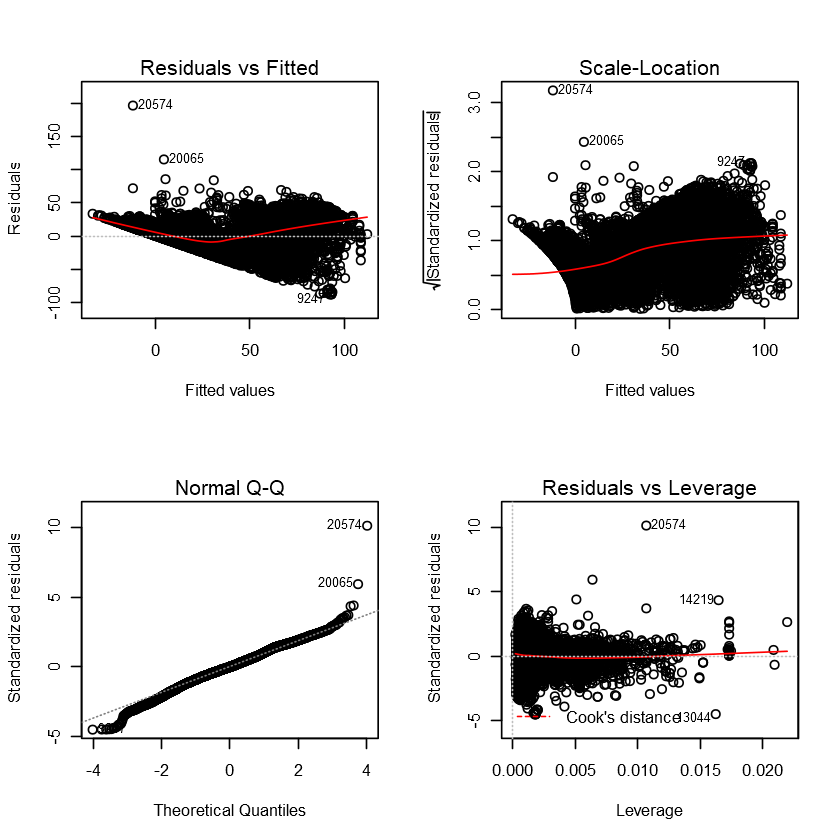

In [31]:
par(mfcol=c(2,2))
plot(my.fit)

In [32]:
pred.lm <- predict(my.fit, normalize.test.data)

In [33]:
mean((pred.lm - test.data$critical_temp)^2)

[1] 386.0145

### 3.4 Ridge and Lasso Regression

In machine learning, we also call Lasso as $L_1$ regularizition and Ridge as $L_2$ regularization. The difference between the two regularization methods lies in how they penalize the estimated parameters of your model. The Ridge regularization will shrink all the estimated parameters towards zero, but never equal to zero. In contrast, the Lasso regularization will force some of the estimated parameters to be zero.


In this assignment, we are going to perform $L_2$ and  $L_1$ regularization i.e
     * Ridge regression (L-2 regularization)
     * Lasso (L-1 regularization)

We will develop linear model to predict the Critical temparature of superconductors and we will begin with **Ridge Regression.**

### 3.4.1 Reguarlize the coefficients with the $L_2$ regularization

We will fit ridge regression model on the training dataset, with shrinkage parameter $\lambda$, here our training data taken by the **glmnet** function should be a matrix. So we have to store all the training and testing data in two matrices as shown below.

In [34]:
set.seed(56)
train.mat <- model.matrix(critical_temp ~ ., data = normalize.new.data1)[,-1]
test.mat <- model.matrix(critical_temp ~ ., data = normalize.test.data1)[,-1]

We generate list of lambda values 

In [35]:
#generating list of lambda values that will be used in cross validation
grid <- 10^seq(4, -2, length = 100)

As we got the list of lamda values, we will fit ridge model using cv.glmnet() function.

In [36]:
options(warn=-1)
set.seed(2)# the purpose of fixing the seed of the random number generator is to make the result repeatable.
fit.ridge <- glmnet(train.mat, normalize.new.data1$critical_temp, alpha = 0, lambda = grid, thresh = 1e-12)
cv.ridge <- cv.glmnet(train.mat, normalize.new.data1$critical_temp, alpha = 0, lambda = grid, thresh = 1e-12)
bestlam.ridge <- cv.ridge$lambda.min
bestlam.ridge

[1] 0.01321941

### Ridge Result

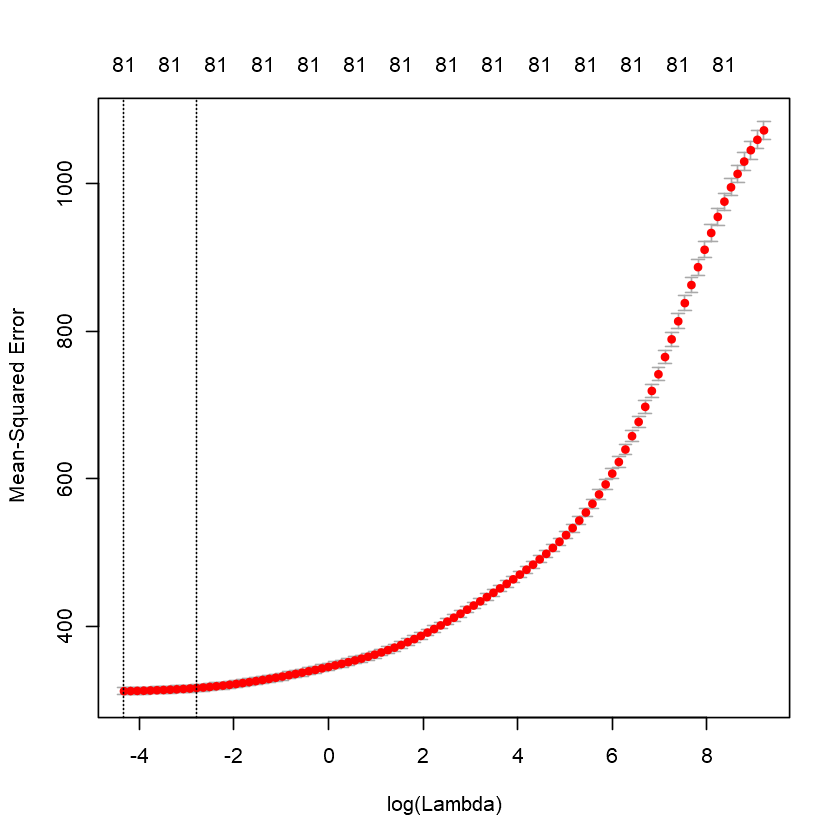

In [74]:
plot(cv.ridge)

In [37]:
pred.ridge <- predict(fit.ridge, s = bestlam.ridge, newx = test.mat)
mean((pred.ridge - normalize.test.data1$critical_temp)^2)

[1] 315.9953

We have got the mean squared error `315.995` for ridge regression.

### 3.4.2 Regularize the coefficients with the $L_1$ regularization
 
We will fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [38]:
set.seed(56)# the purpose of fixing the seed of the random number generator is to make the result repeatable.
fit.lasso <- glmnet(train.mat, normalize.new.data1$critical_temp, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso <- cv.glmnet(train.mat, normalize.new.data1$critical_temp, alpha = 1, lambda = grid, thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min
bestlam.lasso

[1] 0.0231013

In [39]:
pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)
mean((pred.lasso - normalize.test.data1$critical_temp)^2)

[1] 321.4948

The mean squared error value for lasso is `321.494`

In [40]:
predict(fit.lasso, s = bestlam.lasso, type = "coefficients")

82 x 1 sparse Matrix of class "dgCMatrix"
                                          1
(Intercept)                      34.5138792
number_of_elements               -4.7967752
mean_atomic_mass                  7.7561923
wtd_mean_atomic_mass             -6.1580965
gmean_atomic_mass                 .        
wtd_gmean_atomic_mass             .        
entropy_atomic_mass              -7.2088948
wtd_entropy_atomic_mass           2.7821442
range_atomic_mass                 7.7654384
wtd_range_atomic_mass            -0.2676767
std_atomic_mass                  -0.4591058
wtd_std_atomic_mass              -5.1443755
mean_fie                          1.0841323
wtd_mean_fie                      .        
gmean_fie                         .        
wtd_gmean_fie                     1.4037378
entropy_fie                       .        
wtd_entropy_fie                   6.4995253
range_fie                        17.6338534
wtd_range_fie                     3.5631974
std_fie                         -1

### Lasso result

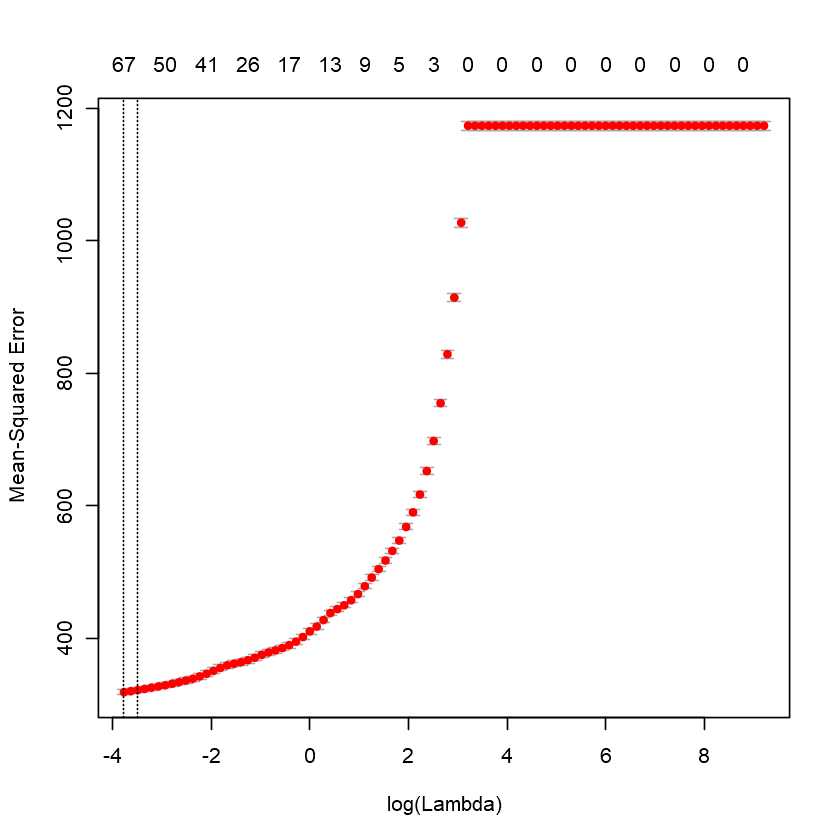

In [95]:
plot(cv.lasso)

As the Lasso regression shrinks the coefficients to zero and gives the best features for the model and we can see the features obtained after building lasso regression are in the above cell output.

In [42]:
mean((pred.lm - test.data$critical_temp)^2)
mean((pred.ridge - test.data1$critical_temp)^2)
mean((pred.lasso - test.data1$critical_temp)^2)

[1] 386.0145

[1] 315.9953

[1] 321.4948

### 3.5 Forward Selection & Backward selection

**Forward stepwise selection**: Starts with one-variable models, gradually add one variable, end with a model including all the specified variables.

**Backward stepwise selection**: Starts with a full model, gradually exclude one variable, end with one-variable models.

After applying both the selection methods, we build linear models with obtained features from forward and backward and check for model performance. 

### 3.5.1 Forward Selection

We start with forward stepwise selection method using regsubsets().

In [44]:
set.seed(56)
regfit.fwd <- regsubsets(critical_temp ~ . , data = normalize.new.data1 , nvmax = 81, method = "forward")

In [45]:
reg.summary.fwd <- summary(regfit.fwd)
reg.summary.fwd

Subset selection object
Call: regsubsets.formula(critical_temp ~ ., data = normalize.new.data1, 
    nvmax = 81, method = "forward")
81 Variables  (and intercept)
                                Forced in Forced out
number_of_elements                  FALSE      FALSE
mean_atomic_mass                    FALSE      FALSE
wtd_mean_atomic_mass                FALSE      FALSE
gmean_atomic_mass                   FALSE      FALSE
wtd_gmean_atomic_mass               FALSE      FALSE
entropy_atomic_mass                 FALSE      FALSE
wtd_entropy_atomic_mass             FALSE      FALSE
range_atomic_mass                   FALSE      FALSE
wtd_range_atomic_mass               FALSE      FALSE
std_atomic_mass                     FALSE      FALSE
wtd_std_atomic_mass                 FALSE      FALSE
mean_fie                            FALSE      FALSE
wtd_mean_fie                        FALSE      FALSE
gmean_fie                           FALSE      FALSE
wtd_gmean_fie                       FALSE 

Now we generate a set of plots which tell us the model performance such as C_p(Process Capability), BIC(Bayseian Information Criterian), Adjusted R^2 and RSS.


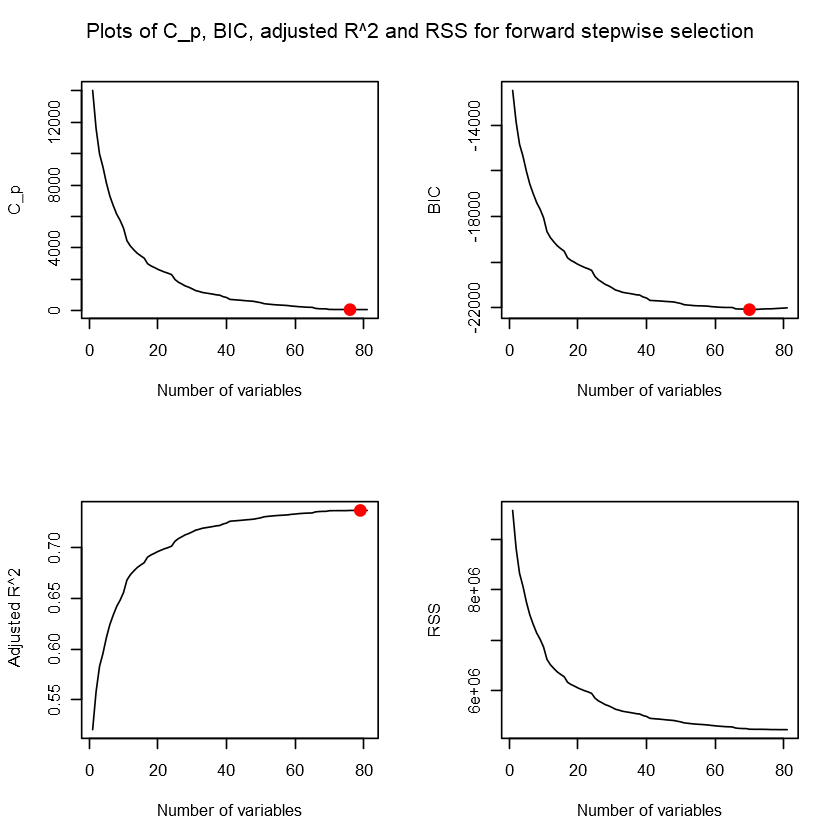

In [46]:
set.seed(56)
par(mfrow = c(2, 2))
plot(reg.summary.fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.fwd$cp), reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.fwd$bic), reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.fwd$adjr2), reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

So let's look into **BIC** value, 

**BIC** is also criteria for model selecting the model which measures the trade off between model fit and model complexity. The optimal model is selected based on minimum BIC. 

As we can see from the above plots, best values of Adjusted R^2, C_p and RSS are occurs at number of values is equal to 80 but lowest BIC value occurs for number variables is equal to `70`.

[1] 70


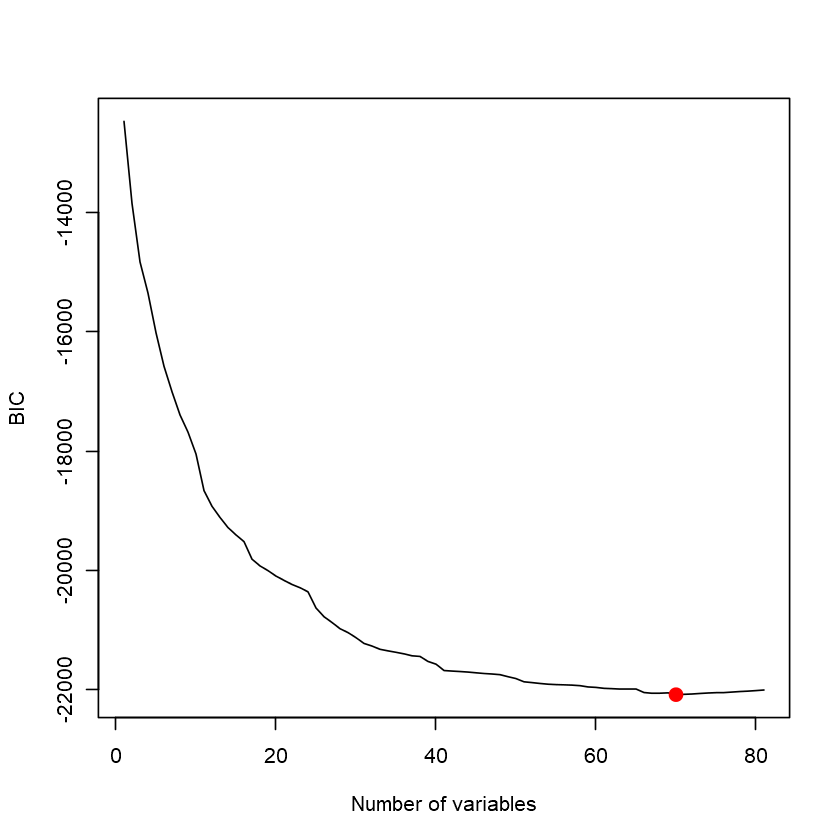

In [47]:
set.seed(56)
plot(reg.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
minbic = which.min(reg.summary.fwd$bic)
points(minbic, reg.summary.fwd$bic[minbic], col = "red", cex = 2, pch = 20)
print(minbic)

So from the above graph, The lower BIC value is at 70 variables. To check the model performance for those 70 variables, we fit lm() model and check the model performance.

Fitting linear model for the 70 features obtained from forward selection then we check for model performance.

In [48]:
# creating a dataframe for all the 74 features obtained
set.seed(56)
fwd.features <- as.data.frame(coef(regfit.fwd,70))
fwd.data <- normalize.new.data1[,c(rownames(fwd.features)[-1],'critical_temp')]
fwd.test <- normalize.test.data1[,c(rownames(fwd.features)[-1],'critical_temp')]

In [49]:
head(fwd.data)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence,critical_temp
14496,-0.77960044,-0.6262011,0.3455590,-0.28662434,0.6702172,-0.4233560,-0.77055299,-0.9512709,-0.8709941,-1.4262475,...,-0.5593677,-0.4375421,2.68957212,2.50188736,-0.50724093,-0.623403357,-1.64532831,1.5323531,-1.4799389,5.450
20211,-0.08366743,-0.1881945,0.3426728,0.21435452,0.5471115,0.4548448,-0.16349033,-0.8068121,-0.8415106,-0.4442313,...,-0.7983653,-0.9051109,1.00948566,0.99991543,-0.01111413,0.009350462,1.57462562,0.6088935,1.8367604,13.000
15139,-0.77960044,0.7020919,-0.2585035,0.41690598,-0.3266008,-0.6789206,-1.10291304,0.2993972,0.6841681,0.5724444,...,0.1019964,0.1282708,-0.19057610,-0.04966346,-0.50724093,-1.065147154,-1.64532831,0.5115750,-1.4799389,1.996
6566,1.30819858,0.2563904,-0.5840887,-0.04605959,-0.6617016,1.0292422,1.56070323,1.3367089,1.0957463,0.7157340,...,0.7409938,0.7473595,-0.83060903,-0.81870752,1.21157256,1.060870918,-0.84033983,-0.5362590,-0.7766290,80.000
13975,-0.77960044,-0.7892916,0.3408666,-0.47178236,0.6151935,-0.4730857,-1.32393022,-0.9139645,-0.8434299,-1.1760611,...,-0.2502147,-0.7682598,0.76947331,1.33478549,-0.56097488,-1.173984116,-0.03535135,2.0651183,-0.1420215,9.100
10502,-0.08366743,-0.9158357,-0.3748271,-0.87300934,-0.3899818,-0.1849825,0.08618266,0.1332927,0.1546427,0.3042183,...,-1.1020713,-0.9987091,0.04943626,0.01843768,0.08897995,0.733236227,0.76963714,-0.7509262,0.9189623,4.100


In [50]:
# fitting the model
fwd.fit <- lm(critical_temp~. , data = fwd.data)

In [51]:
summary(fwd.fit)


Call:
lm(formula = critical_temp ~ ., data = fwd.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.876  -9.351   0.456  10.873 168.965 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      34.51388    0.13476 256.115  < 2e-16 ***
number_of_elements               -5.52728    1.17635  -4.699 2.64e-06 ***
mean_atomic_mass                 22.68479    2.55877   8.866  < 2e-16 ***
wtd_mean_atomic_mass            -27.56520    3.40211  -8.102 5.75e-16 ***
gmean_atomic_mass               -12.78573    2.67362  -4.782 1.75e-06 ***
wtd_gmean_atomic_mass            20.54416    3.62666   5.665 1.50e-08 ***
entropy_atomic_mass             -12.18981    1.79913  -6.775 1.28e-11 ***
wtd_entropy_atomic_mass          -0.27742    1.46449  -0.189 0.849758    
range_atomic_mass                10.84993    0.98260  11.042  < 2e-16 ***
std_atomic_mass                  -9.48327    1.33385  -7.110 1.21e-12 ***
wtd_std_atomic_mass  

We know Adjusted R-squared:  0.7323 for linear model with all features and linear model obtained from the forward selection method features, Adjusted R-squared:  0.7315, which slightly decreased compared with the original Linear model.

In [52]:
fwd.pred <- predict(fwd.fit, fwd.test)
mean((fwd.pred - fwd.test$critical_temp)^2)

[1] 315.8202

### Backward Selection

Similarly like Forward selection method, we execute backward selection method and try to get the best features, build linear model.

In [53]:
set.seed(56)
regfit.bwd <- regsubsets(critical_temp ~ . , data = normalize.new.data1, nvmax = 81, method = "backward")
reg.summary.bwd <- summary(regfit.bwd)
reg.summary.bwd

Subset selection object
Call: regsubsets.formula(critical_temp ~ ., data = normalize.new.data1, 
    nvmax = 81, method = "backward")
81 Variables  (and intercept)
                                Forced in Forced out
number_of_elements                  FALSE      FALSE
mean_atomic_mass                    FALSE      FALSE
wtd_mean_atomic_mass                FALSE      FALSE
gmean_atomic_mass                   FALSE      FALSE
wtd_gmean_atomic_mass               FALSE      FALSE
entropy_atomic_mass                 FALSE      FALSE
wtd_entropy_atomic_mass             FALSE      FALSE
range_atomic_mass                   FALSE      FALSE
wtd_range_atomic_mass               FALSE      FALSE
std_atomic_mass                     FALSE      FALSE
wtd_std_atomic_mass                 FALSE      FALSE
mean_fie                            FALSE      FALSE
wtd_mean_fie                        FALSE      FALSE
gmean_fie                           FALSE      FALSE
wtd_gmean_fie                       FALSE

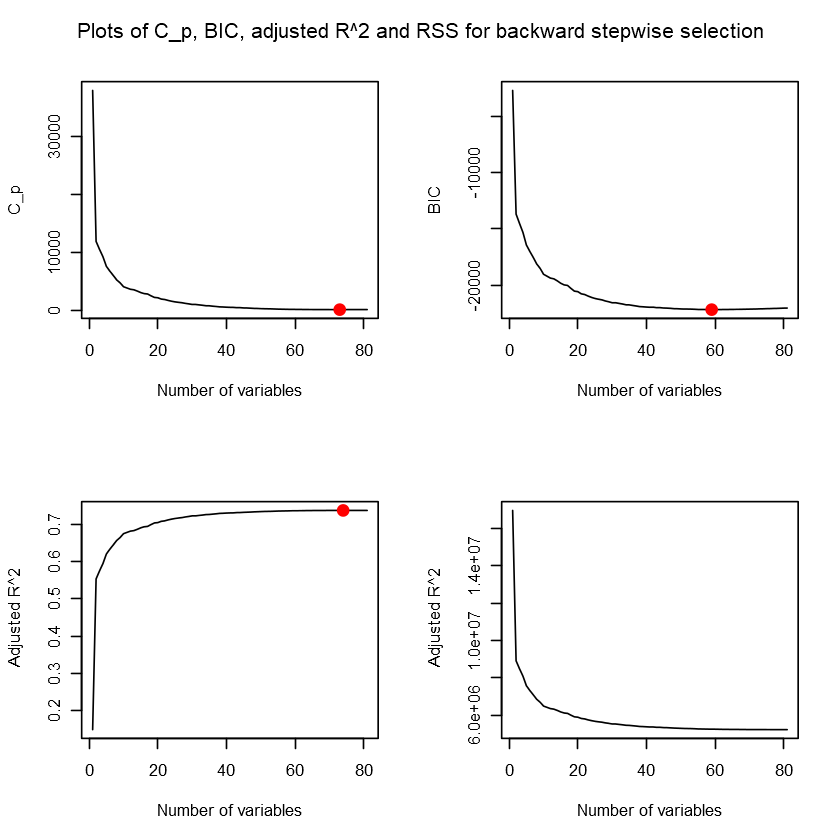

In [54]:
set.seed(56)
par(mfrow = c(2, 2))
plot(reg.summary.bwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.bwd$cp), reg.summary.bwd$cp[which.min(reg.summary.bwd$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.bwd$bic), reg.summary.bwd$bic[which.min(reg.summary.bwd$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.bwd$adjr2), reg.summary.bwd$adjr2[which.max(reg.summary.bwd$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg.summary.bwd$rss, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward stepwise selection", side = 3, line = -2, outer = TRUE)

[1] 59


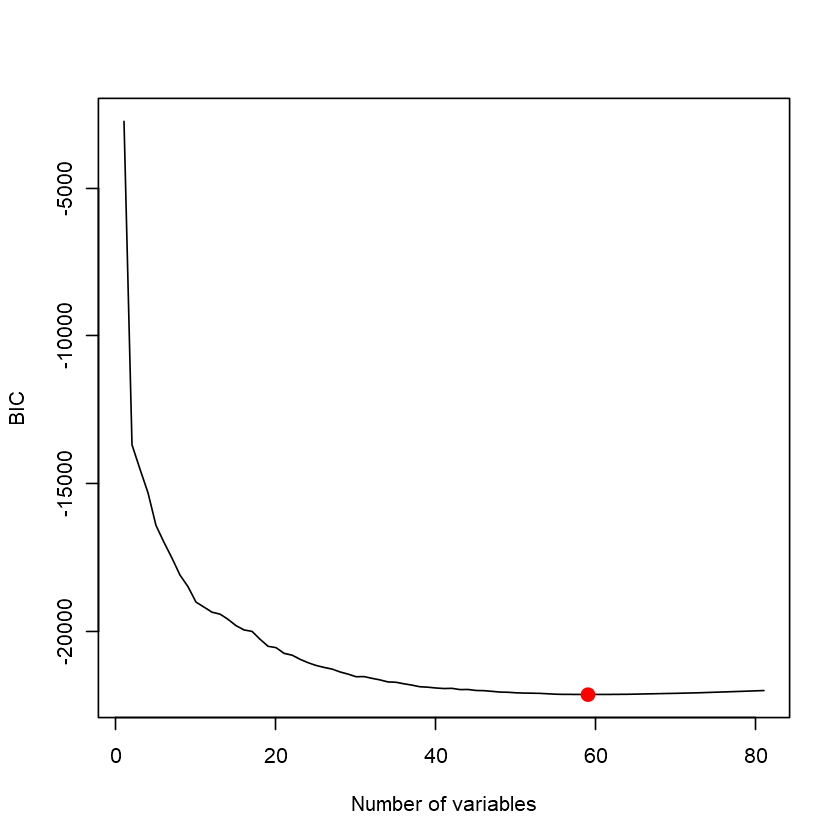

In [55]:
set.seed(56)
plot(reg.summary.bwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
minbic = which.min(reg.summary.bwd$bic)
points(minbic, reg.summary.bwd$bic[minbic], col = "red", cex = 2, pch = 20)
print(minbic)

In [56]:
set.seed(56)
bwd.features <- as.data.frame(coef(regfit.bwd,59))
bwd.data <- normalize.new.data1[,c(rownames(bwd.features)[-1],'critical_temp')]
bwd.test <- normalize.test.data1[,c(rownames(bwd.features)[-1],'critical_temp')]

In [57]:
head(bwd.data)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,range_atomic_mass,std_atomic_mass,wtd_mean_fie,wtd_gmean_fie,...,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_std_Valence,critical_temp
14496,-0.77960044,-0.6262011,0.3455590,-0.28662434,0.6702172,-0.4233560,-0.9512709,-0.8709941,-0.2611994,-0.08359572,...,-0.7077518,-0.06035720,-0.5593677,2.82196491,2.50188736,-0.50724093,-0.623403357,-1.64532831,-1.4799389,5.450
20211,-0.08366743,-0.1881945,0.3426728,0.21435452,0.5471115,0.4548448,-0.8068121,-0.8415106,-0.3132872,-0.08403926,...,-0.8294168,-0.53837149,-0.7983653,0.74471416,0.99991543,-0.01111413,0.009350462,1.57462562,1.8367604,13.000
15139,-0.77960044,0.7020919,-0.2585035,0.41690598,-0.3266008,-0.6789206,0.2993972,0.6841681,-2.1314344,-2.23737137,...,-0.1710468,2.19926340,0.1019964,-0.05466032,-0.04966346,-0.50724093,-1.065147154,-1.64532831,-1.4799389,1.996
6566,1.30819858,0.2563904,-0.5840887,-0.04605959,-0.6617016,1.0292422,1.3367089,1.0957463,0.8885443,0.82671793,...,0.9374073,-0.01473597,0.7409938,-0.73600964,-0.81870752,1.21157256,1.060870918,-0.84033983,-0.7766290,80.000
13975,-0.77960044,-0.7892916,0.3408666,-0.47178236,0.6151935,-0.4730857,-0.9139645,-0.8434299,-1.3716250,-1.33882999,...,-0.4419032,-0.74848069,-0.2502147,0.82258346,1.33478549,-0.56097488,-1.173984116,-0.03535135,-0.1420215,9.100
10502,-0.08366743,-0.9158357,-0.3748271,-0.87300934,-0.3899818,-0.1849825,0.1332927,0.1546427,0.2499695,0.22327670,...,-1.0845671,-0.98721065,-1.1020713,0.02211708,0.01843768,0.08897995,0.733236227,0.76963714,0.9189623,4.100


In [58]:
# lm model
bwd.fit <- lm(critical_temp~. , data = bwd.data)

In [59]:
summary(bwd.fit)


Call:
lm(formula = critical_temp ~ ., data = bwd.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.999  -9.432   0.578  10.979 168.211 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    34.5139     0.1349 255.860  < 2e-16 ***
number_of_elements             -5.2853     1.1492  -4.599 4.27e-06 ***
mean_atomic_mass               22.4442     1.8231  12.311  < 2e-16 ***
wtd_mean_atomic_mass          -29.3358     1.6244 -18.059  < 2e-16 ***
gmean_atomic_mass             -12.0570     1.9832  -6.080 1.23e-09 ***
wtd_gmean_atomic_mass          21.4842     1.9456  11.042  < 2e-16 ***
entropy_atomic_mass           -11.2289     1.4471  -7.760 9.01e-15 ***
range_atomic_mass              10.3167     0.9712  10.622  < 2e-16 ***
std_atomic_mass                -8.0114     0.9623  -8.325  < 2e-16 ***
wtd_mean_fie                  -27.3742     5.1670  -5.298 1.19e-07 ***
wtd_gmean_fie                  25.8181     4.3558   5.

In [60]:
bwd.pred <- predict(bwd.fit, bwd.test)
mean((bwd.pred - bwd.test$critical_temp)^2)

[1] 315.9786

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

We have build the models linear regression using backward and forward selection methods and with new set of variables, ridge regression and lasso regression. we consider good model based on the performances of these models on test data i.e considering Mean Squared Error(MSE) values.

First of all we look into Anova test for all the three models built.
- lm with reduced features, lm with forward selection and backward selection.
We examine the models based on anova test anova() function is used. 


### Null Hypothesis:

Null Hypothesis: New model is as good as Original model

Alternatively : Original model is significantly better.

We take significance value as 0.01 and for model who significance level is less than 0.01, we reject the null hypothesis.


In [96]:
anova(my.fit,all.fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
16979,6509635,NA,NA,NA,NA
16928,5223561,51,1286074,81.7212,0


In this case, the model with reduced features, p value is less than 0.01, so we can reject the null hypothesis.
It is not statistically significant that original model and the model with only the coefficients are not strongly associated with the response. In regard to the interpretability of the model, we'd prefer a model with more predictors than the reduced predictors.

In [97]:
anova(bwd.fit,all.fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
16950,5246350,NA,NA,NA,NA
16928,5223561,22,22789.61,3.357014,1.686285e-07


When we are applying anova function on bwd.fit(Backward selection) and all.fit(Original Model), the p-value is less than 0.01, we can reject the hypothesis which means backward selection is not statistically significant with Original model.


In [100]:
anova(fwd.fit,all.fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
16939,5232494,NA,NA,NA,NA
16928,5223561,11,8933.424,2.631869,0.002324497


From the above anova test, p value (0.0023) less than 0.01, which implies we reject the null hypothesis. 

Now let's move on to MSE(Mean Squared Error) as shown below,

In [83]:
cat('Original LM Mean Squared Error')
mean((predall.lm - normalize.test.data1$critical_temp)^2)
cat('-----------------------------------------------------------------------')
cat('\n')
cat('Mean Squared Error for Less Features Selection model')
mean((pred.lm - test.data$critical_temp)^2)
cat('-----------------------------------------------------------------------')
cat('\n')
print('Mean Squared Error for Ridge Regression')
mean((pred.ridge - test.data1$critical_temp)^2)
cat('-----------------------------------------------------------------------')
cat('\n')
cat('Mean Squared Error for Lasso Regression')
mean((pred.lasso - test.data1$critical_temp)^2)
cat('-----------------------------------------------------------------------')
cat('\n')
cat('Mean Squared Error for Backward Selection')
mean((bwd.pred - bwd.test$critical_temp)^2)
cat('-----------------------------------------------------------------------')
cat('\n')
cat('Mean Squared Error for Forward Selection')
mean((fwd.pred - fwd.test$critical_temp)^2)

Original LM Mean Squared Error

[1] 315.7538

-----------------------------------------------------------------------
Mean Squared Error for Less Features Selection model

[1] 386.0145

-----------------------------------------------------------------------
[1] "Mean Squared Error for Ridge Regression"


[1] 315.9953

-----------------------------------------------------------------------
Mean Squared Error for Lasso Regression

[1] 321.4948

-----------------------------------------------------------------------
Mean Squared Error for Backward Selection

[1] 315.9786

-----------------------------------------------------------------------
Mean Squared Error for Forward Selection

[1] 315.8202

From the above MSE values we can say that,
- When MSE of Reduced variables is comapared with Original model, MSE of Original linear model is less, we can say the reduced features lm is not the Good model, the MSE is very high compared with Original Model.
- By comparing all the MSE values of all the models, Forward selection method with 70 features gives the least MSE which is 315.820. Also if we consider the Adjusted R^2 of Forward selection linear regression model, it is more compared with backward selection method. But the margin between MSE of forward and Backward is very less which is around `0.14` difference and with backward selection we have got 59 features and model has Adjusted R^2 slightly similiar with forward selection method of 70 features.
- Since models with forward and backward selection methods perform similarly, we can consider models with less features which is nothing but **backward selection method obtained linear regression model.**

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>



After building Linear regression  models on features obtained from backward selection method and features obtained from forward selection, model with backward selection gives 59 variables as best features and model with forward selection gives 70 variables as the best features. Moreover, if we consider model obtained by Lasso regression, it gives 67 variables as best variables as it shrinks the less significant coefficients to 0 and discards them entirely. 

By taking variables obtained using **Backward selection method**, as Lasso model has high MSE and similiar MSE with Forward selection method model when compared with Backward selection method lm() MSE, which resolevs the overfitting problem and more correlation with response variable (critical temparature).


The variables obatined from backward selection are as follows.

In [109]:
final.variables <- rownames(bwd.features)[-1]
final.variables   # variables obtained from backward selection method

[1] "number_of_elements"            "mean_atomic_mass"             
 [3] "wtd_mean_atomic_mass"          "gmean_atomic_mass"            
 [5] "wtd_gmean_atomic_mass"         "entropy_atomic_mass"          
 [7] "range_atomic_mass"             "std_atomic_mass"              
 [9] "wtd_mean_fie"                  "wtd_gmean_fie"                
[11] "entropy_fie"                   "wtd_entropy_fie"              
[13] "range_fie"                     "wtd_range_fie"                
[15] "std_fie"                       "mean_atomic_radius"           
[17] "wtd_mean_atomic_radius"        "wtd_gmean_atomic_radius"      
[19] "entropy_atomic_radius"         "wtd_entropy_atomic_radius"    
[21] "range_atomic_radius"           "wtd_range_atomic_radius"      
[23] "std_atomic_radius"             "wtd_std_atomic_radius"        
[25] "mean_Density"                  "wtd_gmean_Density"            
[27] "wtd_entropy_Density"           "range_Density"                
[29] "std_Density"                   "wtd_mean_ElectronAffinity"    
[31] "gmean_ElectronAffinity"        "wtd_gmean_ElectronAffinity"   
[33] "wtd_entropy_ElectronAffinity"  "range_ElectronAffinity"       
[35] "wtd_range_ElectronAffinity"    "std_ElectronAffinity"         
[37] "wtd_std_ElectronAffinity"      "mean_FusionHeat"              
[39] "wtd_mean_FusionHeat"           "gmean_FusionHeat"             
[41] "wtd_gmean_FusionHeat"          "entropy_FusionHeat"           
[43] "wtd_entropy_FusionHeat"        "range_FusionHeat"             
[45] "wtd_range_FusionHeat"          "wtd_std_FusionHeat"           
[47] "mean_ThermalConductivity"      "wtd_mean_ThermalConductivity" 
[49] "wtd_gmean_ThermalConductivity" "entropy_ThermalConductivity"  
[51] "range_ThermalConductivity"     "wtd_range_ThermalConductivity"
[53] "std_ThermalConductivity"       "gmean_Valence"                
[55] "wtd_gmean_Valence"             "entropy_Valence"              
[57] "wtd_entropy_Valence"           "range_Valence"                
[59] "wtd_std_Valence"

If we see mostly all the variables which are obtained through EDA process are also included  